In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv(r'D:\Smart Fertilizer Recommendation System\data\data_core.csv')

Load Dataset

In [3]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


In [4]:
df.shape

(8000, 9)

Data Inception

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [6]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [7]:
df['Fertilizer Name'].value_counts()

Fertilizer Name
14-35-14    1188
Urea        1170
DAP         1167
10-26-26    1128
17-17-17    1124
28-28       1120
20-20       1103
Name: count, dtype: int64

Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

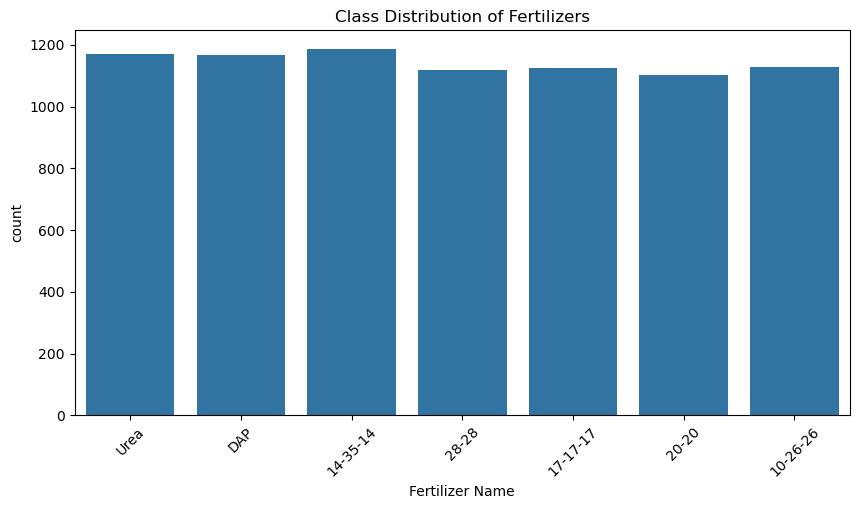

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Fertilizer Name')
plt.title("Class Distribution of Fertilizers")
plt.xticks(rotation=45)
plt.show()


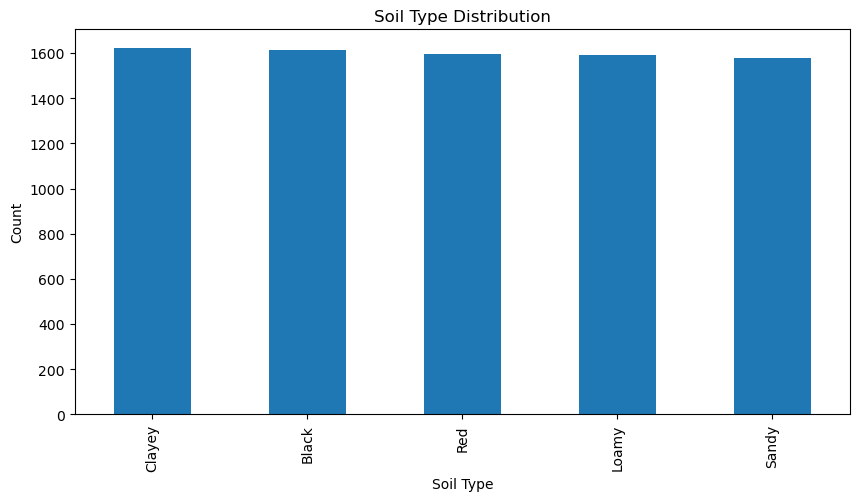

In [10]:
df['Soil Type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Soil Type Distribution")
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.show()

Modeling


In [6]:
class ImprovedFertilizerRecommender:
    def __init__(self):
        self.fertilizer_npk_content = {
            'Urea': {'N': 46, 'P': 0, 'K': 0},
            'DAP': {'N': 18, 'P': 46, 'K': 0},
            '10-26-26': {'N': 10, 'P': 26, 'K': 26},
            '14-35-14': {'N': 14, 'P': 35, 'K': 14},
            '17-17-17': {'N': 17, 'P': 17, 'K': 17},
            '20-20': {'N': 20, 'P': 20, 'K': 0},
            '28-28': {'N': 28, 'P': 28, 'K': 0}
        }
        
        self.crop_requirements = {
            'Maize': {'N': 120, 'P': 60, 'K': 40},
            'Rice': {'N': 100, 'P': 50, 'K': 50},
            'Paddy': {'N': 100, 'P': 50, 'K': 50},
            'Wheat': {'N': 150, 'P': 60, 'K': 40},
            'Cotton': {'N': 110, 'P': 50, 'K': 60},
            'Sugarcane': {'N': 200, 'P': 80, 'K': 120},
            'Ground Nuts': {'N': 25, 'P': 75, 'K': 50},
            'Pulses': {'N': 30, 'P': 60, 'K': 40},
            'Millets': {'N': 80, 'P': 40, 'K': 30},
            'Tobacco': {'N': 120, 'P': 60, 'K': 100},
            'Oil seeds': {'N': 100, 'P': 60, 'K': 40},
            'Barley': {'N': 120, 'P': 60, 'K': 40}
        }
        
        self.model = None
        self.encoders = {}

In [7]:
def rule_based_recommendation(self, nitrogen, phosphorous, potassium, crop_type):
        '''
        Primary recommendation method based on agricultural science
        '''
        # Get crop requirements or use default
        needs = self.crop_requirements.get(crop_type, {'N': 100, 'P': 50, 'K': 50})
        
        # Calculate nutrient deficiencies
        n_deficit = max(0, needs['N'] - nitrogen)
        p_deficit = max(0, needs['P'] - phosphorous)
        k_deficit = max(0, needs['K'] - potassium)
        
        # Agricultural logic for fertilizer selection
        if n_deficit > 80 and p_deficit < 20 and k_deficit < 20:
            return 'Urea'  # High nitrogen need
        elif p_deficit > 30 and n_deficit > 10:
            return 'DAP'  # Phosphorus + some nitrogen
        elif n_deficit > 15 and p_deficit > 15 and k_deficit < 15:
            return '28-28'  # Balanced N-P
        elif abs(n_deficit - p_deficit) < 10 and abs(n_deficit - k_deficit) < 10 and n_deficit > 10:
            return '17-17-17'  # Balanced NPK
        elif p_deficit > 25 and k_deficit > 15:
            return '14-35-14'  # High P with some K
        elif k_deficit > 20 and p_deficit > 20:
            return '10-26-26'  # High P-K
        elif n_deficit > 20 and p_deficit > 15:
            return '20-20'  # N-P combination
        else:
            return '17-17-17'  # Balanced maintenance